In [2]:

import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy import stats
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.odr import ODR, Model, Data, RealData
from pylab import *
from openpyxl import Workbook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

def sinusoidal(x,A,w,phi,C):
      return A*np.sin(x*w+phi)+C

data = pd.read_excel(r"C:\Users\matth\Documents\Phys 382\EPRData.xlsx",None)
MagResonances = np.array([])
FreqResonances = np.array([])

In [4]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess) 
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return popt

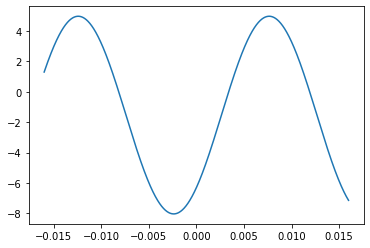

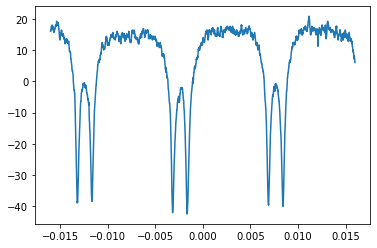

[  6.49835427 313.11349197  -0.35821652  -1.53195849]


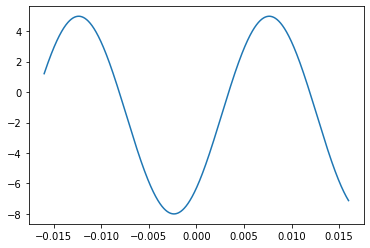

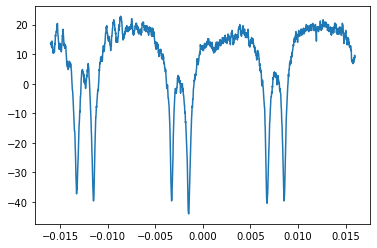

[  6.48781857 313.83477599  -0.36380483  -1.50978873]


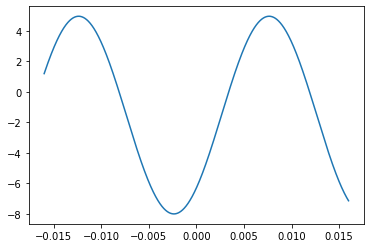

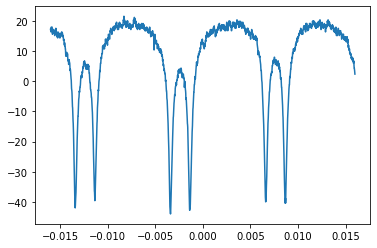

[  6.48786231 313.92014375  -0.36177519  -1.51722829]


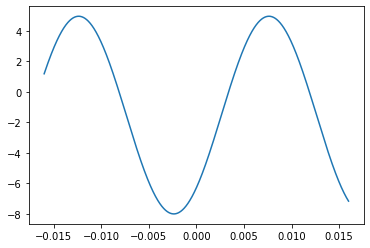

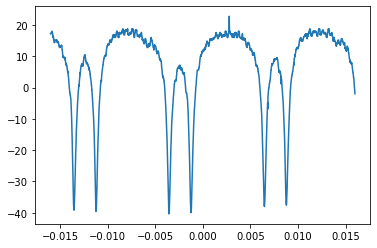

[  6.47009785 314.2190432   -0.35817883  -1.52350632]


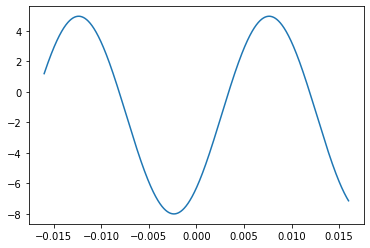

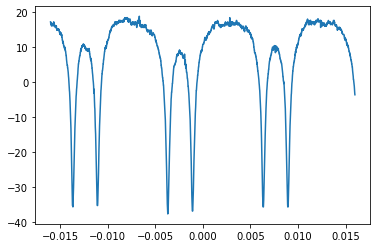

[  6.47941711 313.93942054  -0.36156817  -1.51975026]


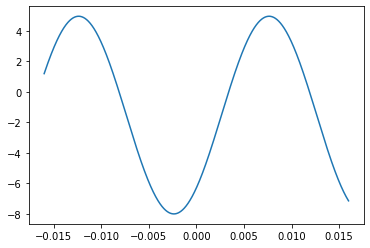

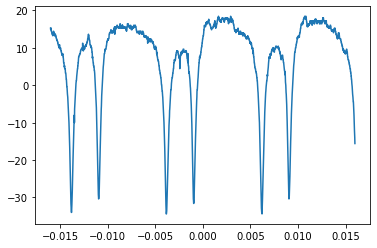

[  6.4796169  313.97915231  -0.36087371  -1.51650254]


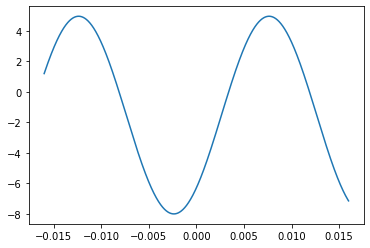

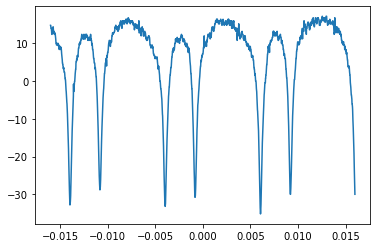

[  6.4839397  313.97947295  -0.36028021  -1.51523086]


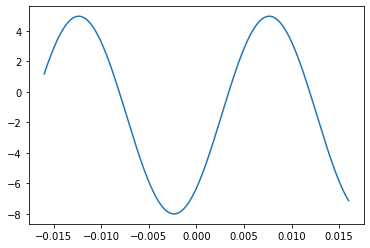

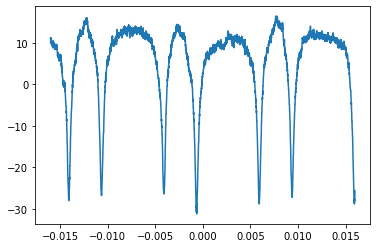

[  6.48671485 313.92512391  -0.36523888  -1.51774995]


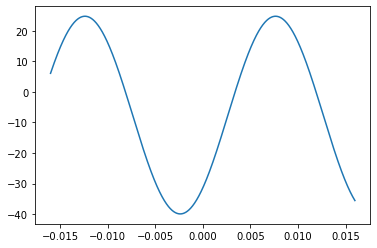

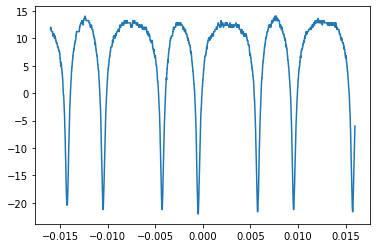

[ 32.36140901 313.68906325  -0.36237058  -7.58147713]


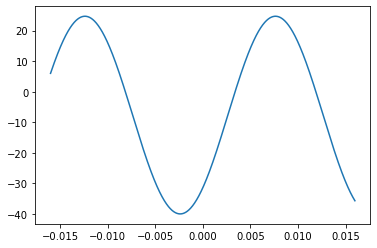

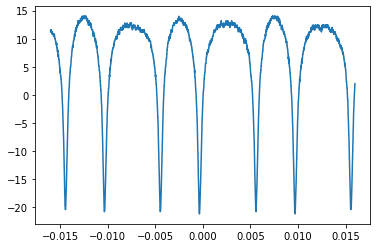

[ 32.3239061  313.82515518  -0.36034794  -7.62648365]


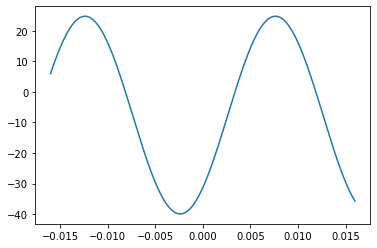

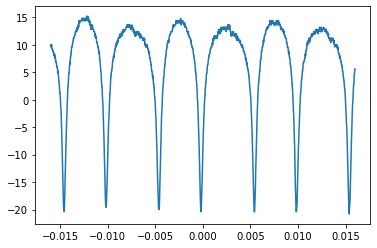

[ 32.3300294  314.03803905  -0.3587469   -7.58488485]


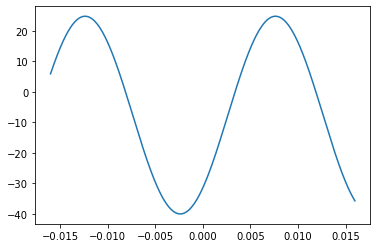

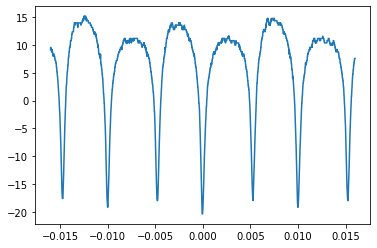

[ 32.40468797 314.04890617  -0.36164872  -7.58053586]


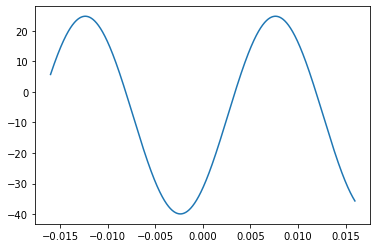

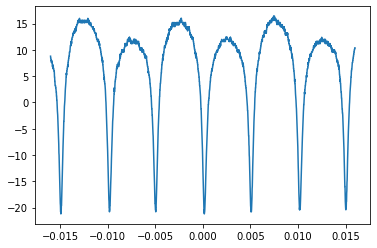

[ 32.31320764 314.34601371  -0.363677    -7.58571597]


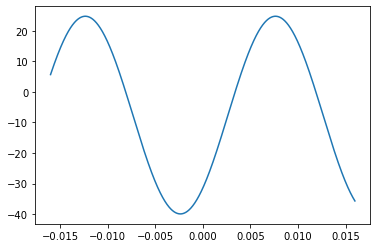

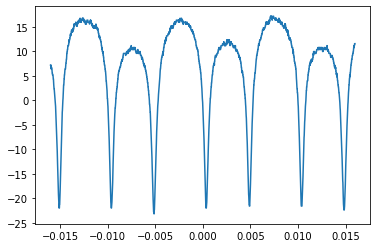

[ 32.32975962 314.39489057  -0.36420263  -7.59653183]


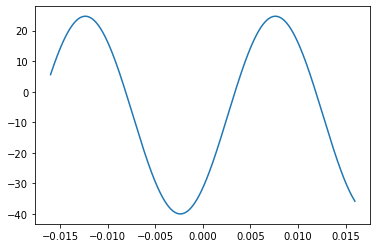

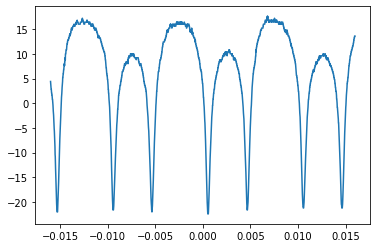

[ 32.35356569 314.55622678  -0.36150483  -7.63978729]


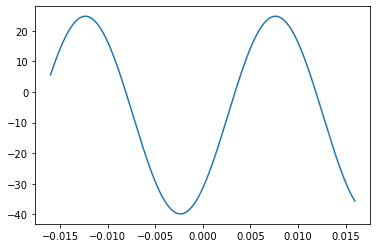

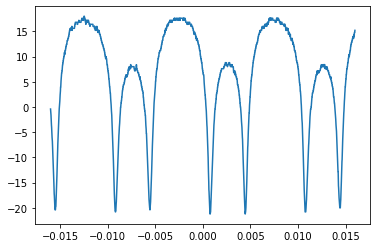

[ 32.29795353 314.56893279  -0.36405703  -7.57473725]


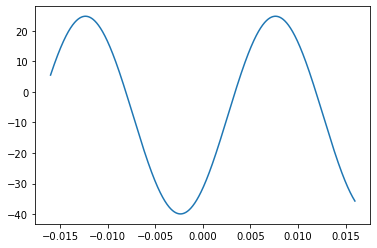

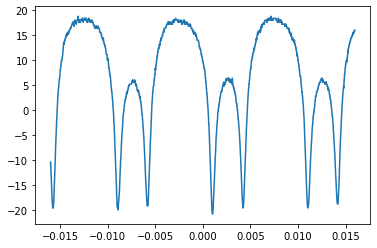

[ 32.32698906 314.6135126   -0.36579173  -7.60353799]


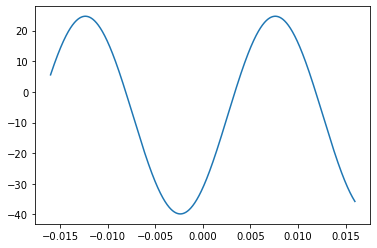

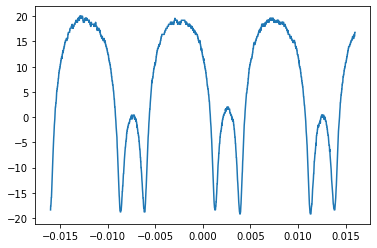

[ 32.25242469 314.78700139  -0.36029826  -7.57250724]


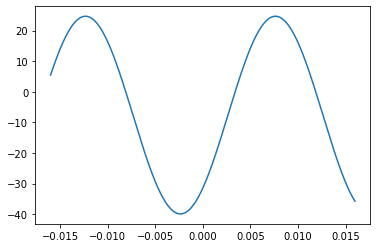

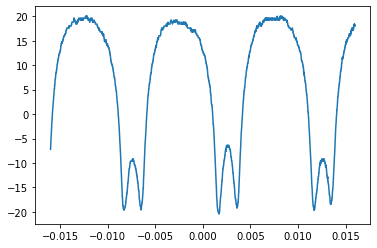

[ 32.30653171 314.74128133  -0.36410788  -7.62721086]


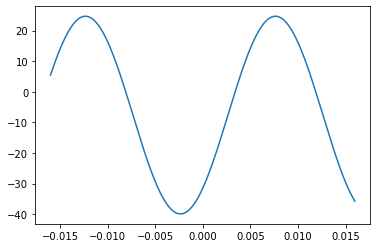

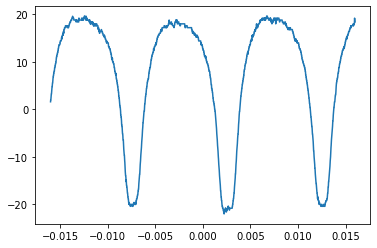

[ 32.29593429 314.68578458  -0.36414089  -7.60211304]


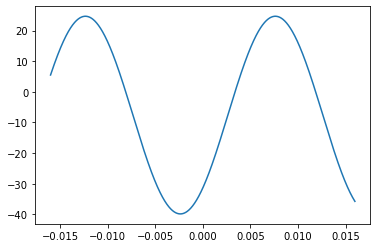

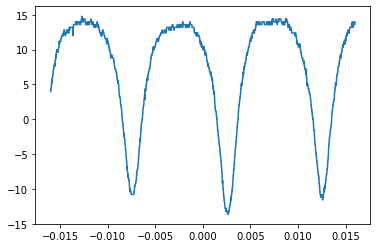

[ 32.25719639 314.79912756  -0.36177518  -7.58838234]


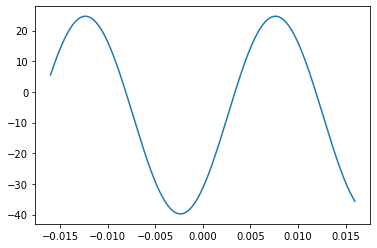

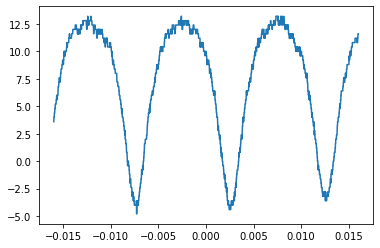

[ 32.21943233 314.6924754   -0.36282469  -7.56836453]


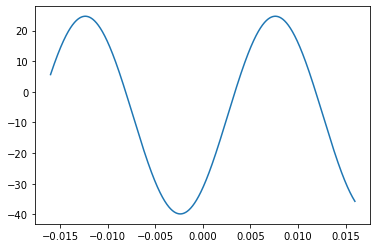

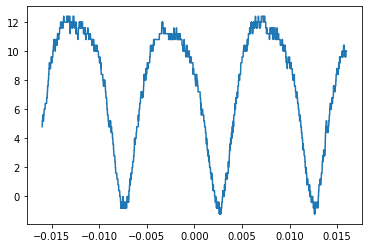

[ 32.2535513  314.61673769  -0.36025406  -7.59365482]


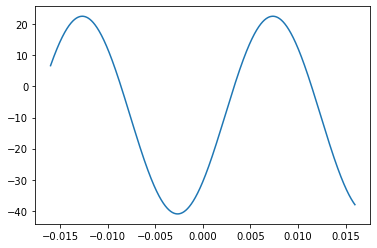

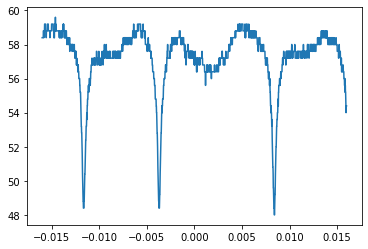

[ 3.17735414e+01  3.13768378e+02 -2.73642037e-01 -9.21788874e+00]


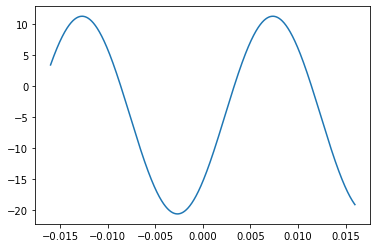

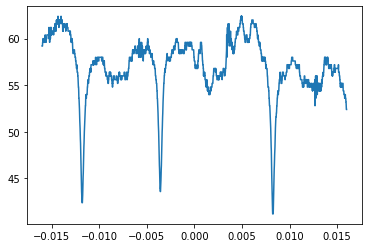

[ 1.58774905e+01  3.13465651e+02 -2.70672211e-01 -4.67397119e+00]


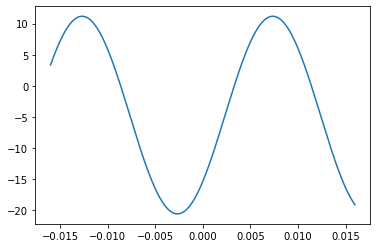

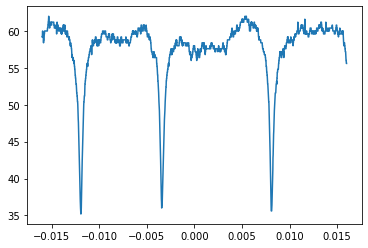

[ 1.58714741e+01  3.13491658e+02 -2.70261601e-01 -4.70149523e+00]


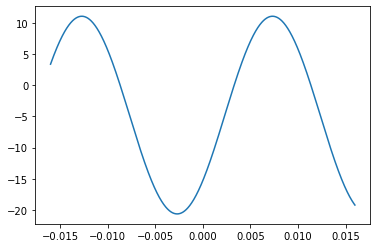

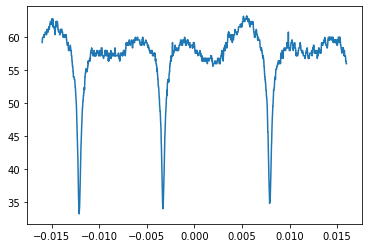

[ 1.58733177e+01  3.13513073e+02 -2.60656758e-01 -4.77468081e+00]


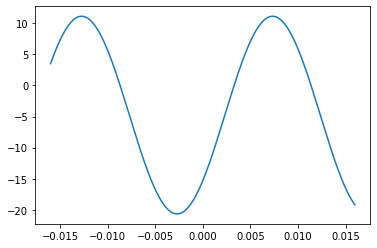

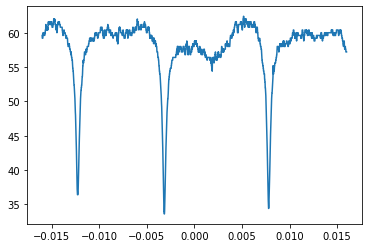

[ 1.58833722e+01  3.13164776e+02 -2.60107600e-01 -4.77000015e+00]


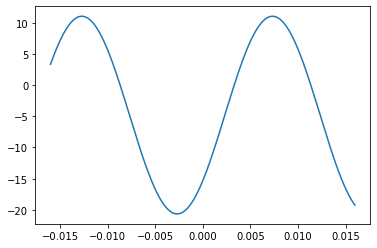

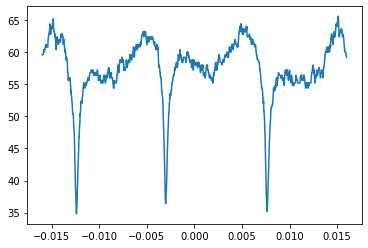

[ 1.58477823e+01  3.13574334e+02 -2.60539751e-01 -4.80428369e+00]


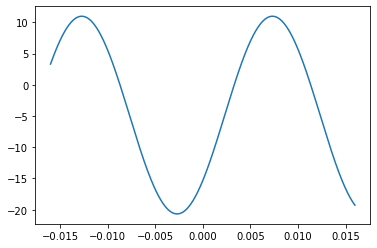

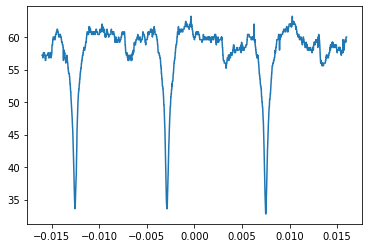

[ 1.58258968e+01  3.13555751e+02 -2.58539715e-01 -4.85350736e+00]


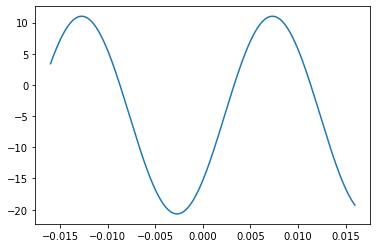

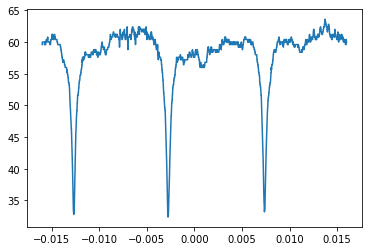

[ 1.58430306e+01  3.13388132e+02 -2.56713882e-01 -4.83859028e+00]


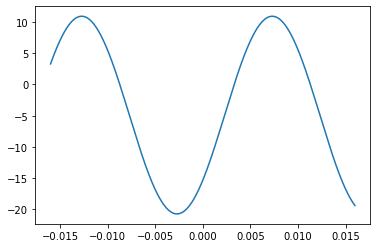

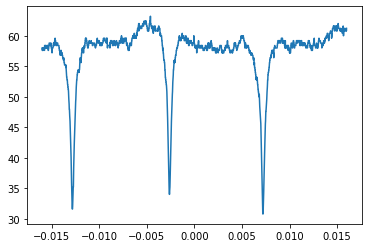

[ 1.58078316e+01  3.13752098e+02 -2.53593133e-01 -4.90251879e+00]


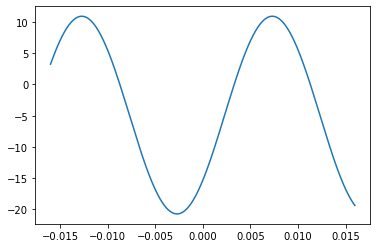

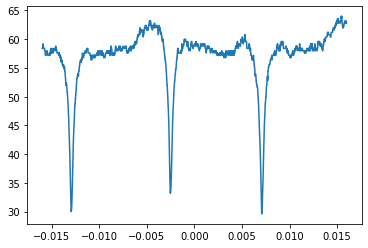

[ 1.58154677e+01  3.13857420e+02 -2.54669629e-01 -4.89974869e+00]


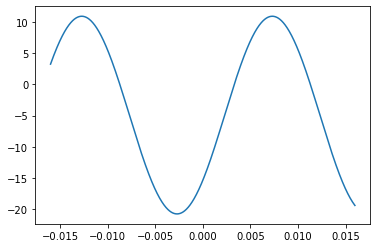

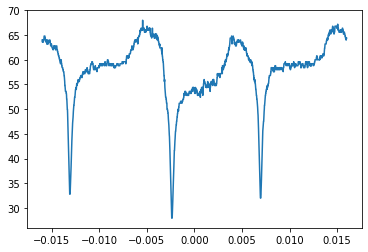

[ 1.58278536e+01  3.13792534e+02 -2.55164020e-01 -4.91909186e+00]


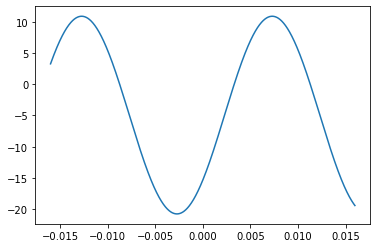

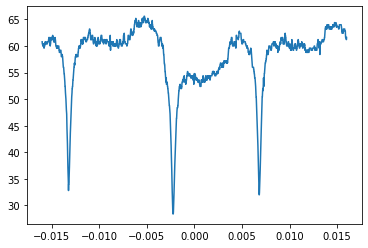

[ 1.58333171e+01  3.13760058e+02 -2.52228856e-01 -4.93982683e+00]


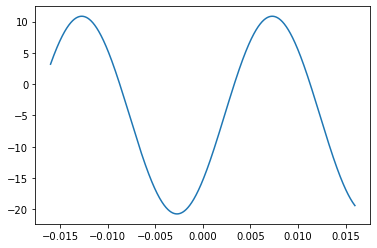

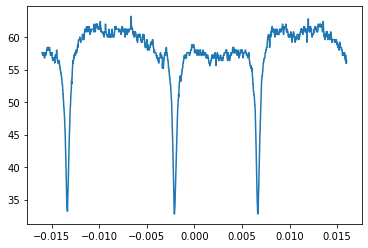

[ 1.58050974e+01  3.13919114e+02 -2.53697473e-01 -4.93904149e+00]


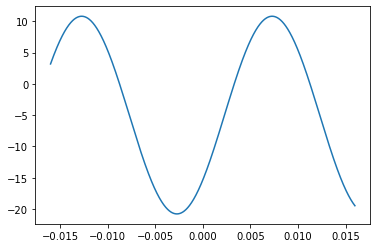

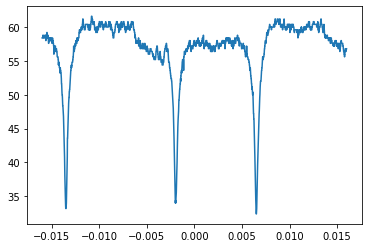

[ 1.57876563e+01  3.13960784e+02 -2.50085996e-01 -4.99318347e+00]
[  0.           0.           0.           0.           0.
   0.           0.           2.34875697   2.35082533  -3.84209409
  -3.85448117   2.34744573   2.35211926   2.30245778   2.30311351
  -3.81335176  -3.82383151   2.30270458   2.31302171   2.2924038
   2.24632153   2.25401877  -3.75564396  -3.77343019   2.24769303
   2.24693696   2.21122363   2.19945713  -3.70636411  -3.71933653
   2.20568462   2.19865464   2.14638325   2.14704331  -3.63706687
  -3.66400311   2.15534861   2.15206414   2.07582927   2.09012435
  -3.58700913  -3.59906268   2.08572903   2.08795525   2.01296345
   2.00908271  -3.51780197  -3.52168287   2.01352569   2.00013702
   9.57491042   9.57888848 -17.06889833 -17.1573124    9.5806022
   9.57319509 -17.02911105   9.06883244   9.07049273 -16.51990135
 -16.73166251   9.10112007   9.08646751 -16.50360316   8.62510114
   8.60308932 -15.99667732 -16.20654758   8.60027143   8.62791078
 -15.97136198   8.09

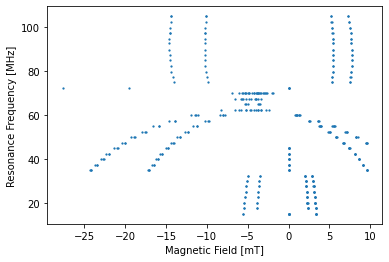

In [6]:
for i, sheet in enumerate(data):

        timeData = (data[sheet]["Time"]).to_numpy()
        EPRData = (data[sheet]["EPR signal"]).to_numpy()
        MagneticData = (data[sheet]["Magnetic Signal"]).to_numpy()

        A=10
        w=50
        phi=2
        C=0
        

        popt =fit_sin(timeData,MagneticData)
        phaseShiftedArtifical = sinusoidal(timeData,popt[0],popt[1],popt[2]-0.001484*popt[1],popt[3])
        MagneticData=phaseShiftedArtifical
        
        
        plt.plot(timeData,phaseShiftedArtifical)
        plt.show()
        plt.plot(timeData,EPRData)
        plt.show()
        print(popt)
        dataRange = (np.max(-EPRData)-np.min(-EPRData))
        t, dict = signal.find_peaks(-EPRData,height=np.max(-EPRData)-dataRange*0.2,prominence=dataRange*0.2)
        t=np.array(t)
        if len(MagResonances) > 0:
            MagResonances=np.append(MagResonances,MagneticData[t])
            FreqResonances=np.append(FreqResonances,([float(sheet) for i in range(len(t))]))
        else:
              MagResonances=t
              FreqResonances=([float(sheet) for i in range(len(t))])

MagResonances = MagResonances*(4.23/6)
for i in range(len(MagResonances)):
      if(MagResonances[i] >10):
            MagResonances[i]=0
print(MagResonances)
print(FreqResonances)

plt.scatter(MagResonances,FreqResonances,marker = ".",s=6)

plt.xlabel("Magnetic Field [mT]")
plt.ylabel("Resonance Frequency [MHz]")

plt.show()